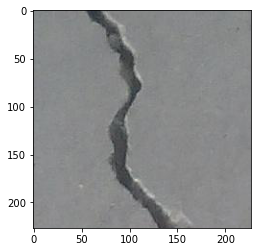

In [21]:
import numpy as np
import glob
import matplotlib.pyplot as plt
import skimage.io
import skimage.color
import skimage.filters
#%matplotlib widget

# load the image
image = skimage.io.imread("data/Positive/00003.jpg")
# image = skimage.io.imread("data/Positive/00034.jpg")

fig, ax = plt.subplots()
plt.imshow(image)

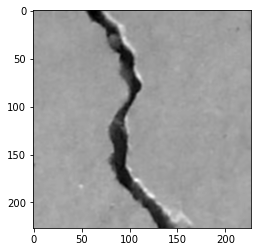

In [22]:
import cv2 as cv

# convert the image to grayscale
gray_image = skimage.color.rgb2gray(image)

# blur the image to denoise
blurred_image = skimage.filters.gaussian(gray_image, sigma=1.0)


fig, ax = plt.subplots()
plt.imshow(blurred_image, cmap="gray") # blurred image

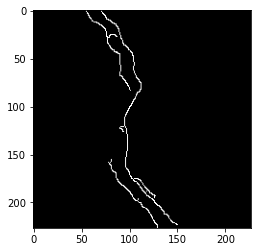

In [23]:
import cv2 as cv


canny_image = cv.Canny((blurred_image*255).astype(np.uint8), 45, 250)

fig, ax = plt.subplots()
plt.imshow(canny_image, cmap="gray") # blurred imag

(0.0, 1.0)

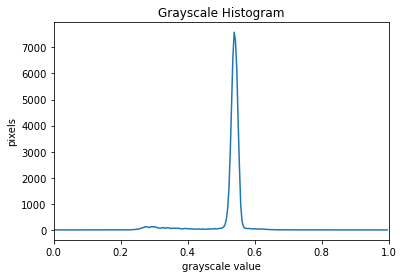

In [24]:
# create a histogram of the blurred grayscale image
histogram, bin_edges = np.histogram(blurred_image, bins=256, range=(0.0, 1.0))

fig, ax = plt.subplots()
plt.plot(bin_edges[0:-1], histogram)
plt.title("Grayscale Histogram")
plt.xlabel("grayscale value")
plt.ylabel("pixels")
plt.xlim(0, 1.0)

Found automatic threshold t = 0.4321440750387515.


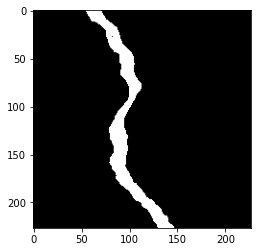

In [25]:
# create a mask based on the threshold
t = skimage.filters.threshold_otsu(blurred_image) # automatically finds the best threshold for the blurred image
print("Found automatic threshold t = {}.".format(t))
binary_mask = blurred_image < t

fig, ax = plt.subplots()
plt.imshow(binary_mask, cmap="gray")

In [26]:
def regenerate_img(img, threshold):
    row, col = img.shape 
    y = np.zeros((row, col))
    for i in range(0,row):
        for j in range(0,col):
            if img[i,j] >= threshold:
                y[i,j] = 1
            else:
                y[i,j] = 0
    return y

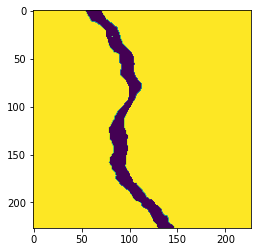

In [27]:
x = regenerate_img(blurred_image, t)
plt.imshow(x)